1. CARGANDO DATOS

Forma del dataset: (20640, 10)

Primeras filas:
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  

Informa

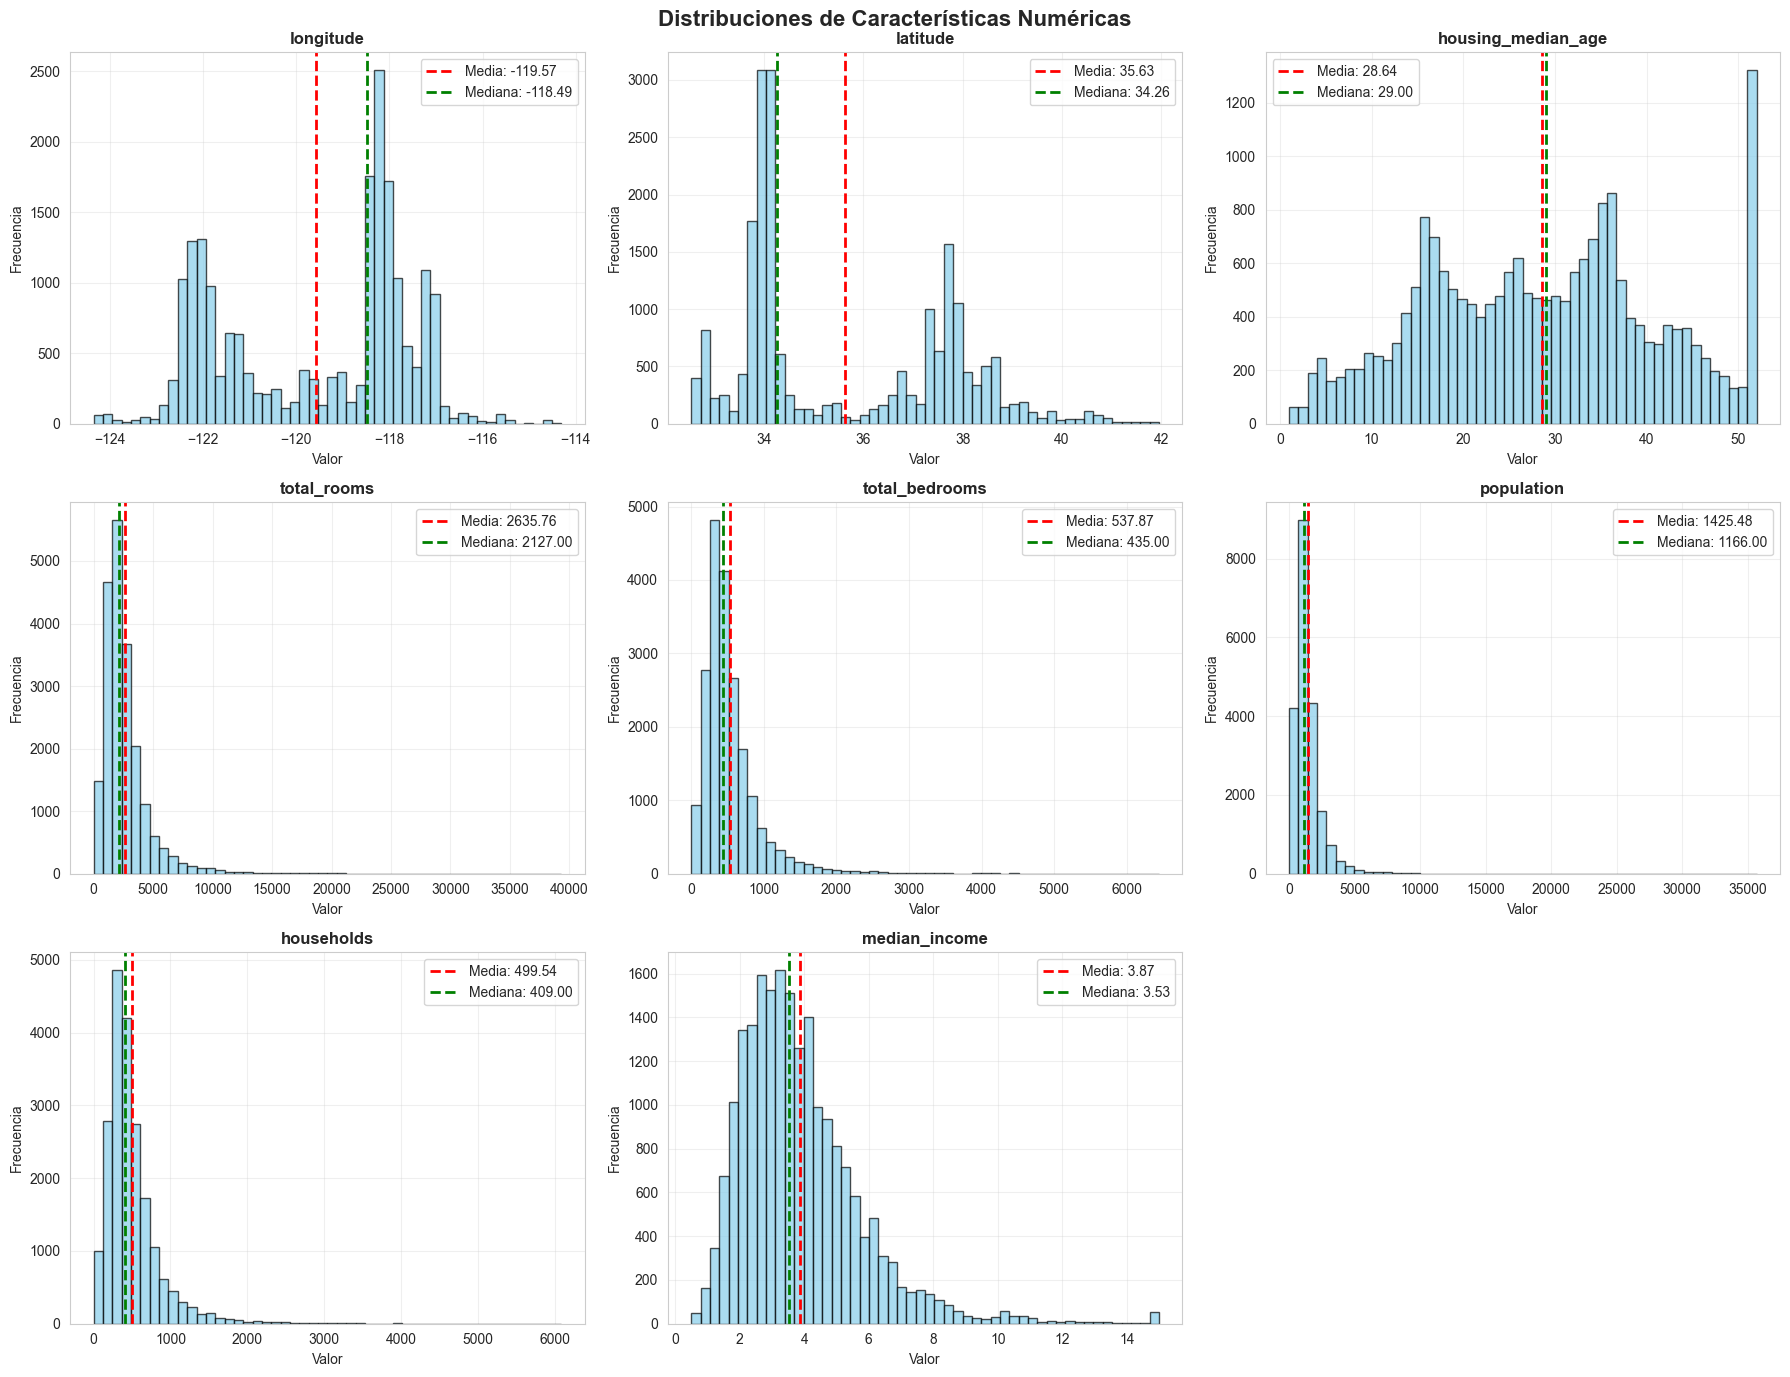


4. ANÁLISIS DETALLADO DE LA VARIABLE TARGET (median_house_value)
✓ Guardado: 02_analisis_target.png


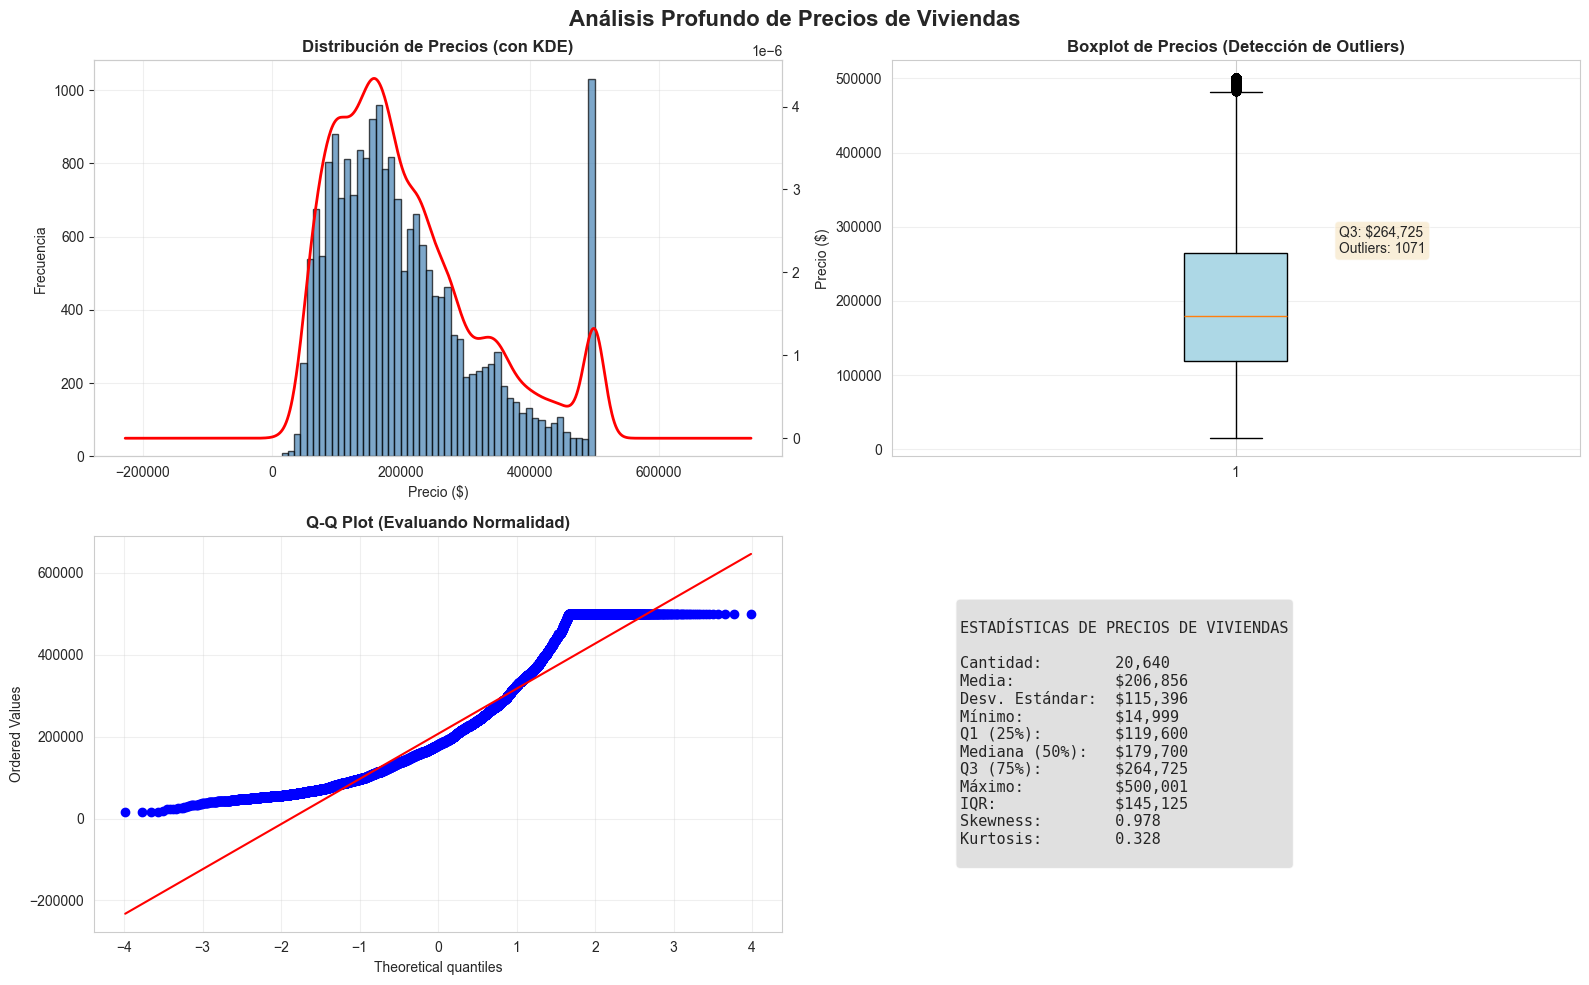


5. ANÁLISIS DE CORRELACIONES
✓ Guardado: 03_matriz_correlacion.png


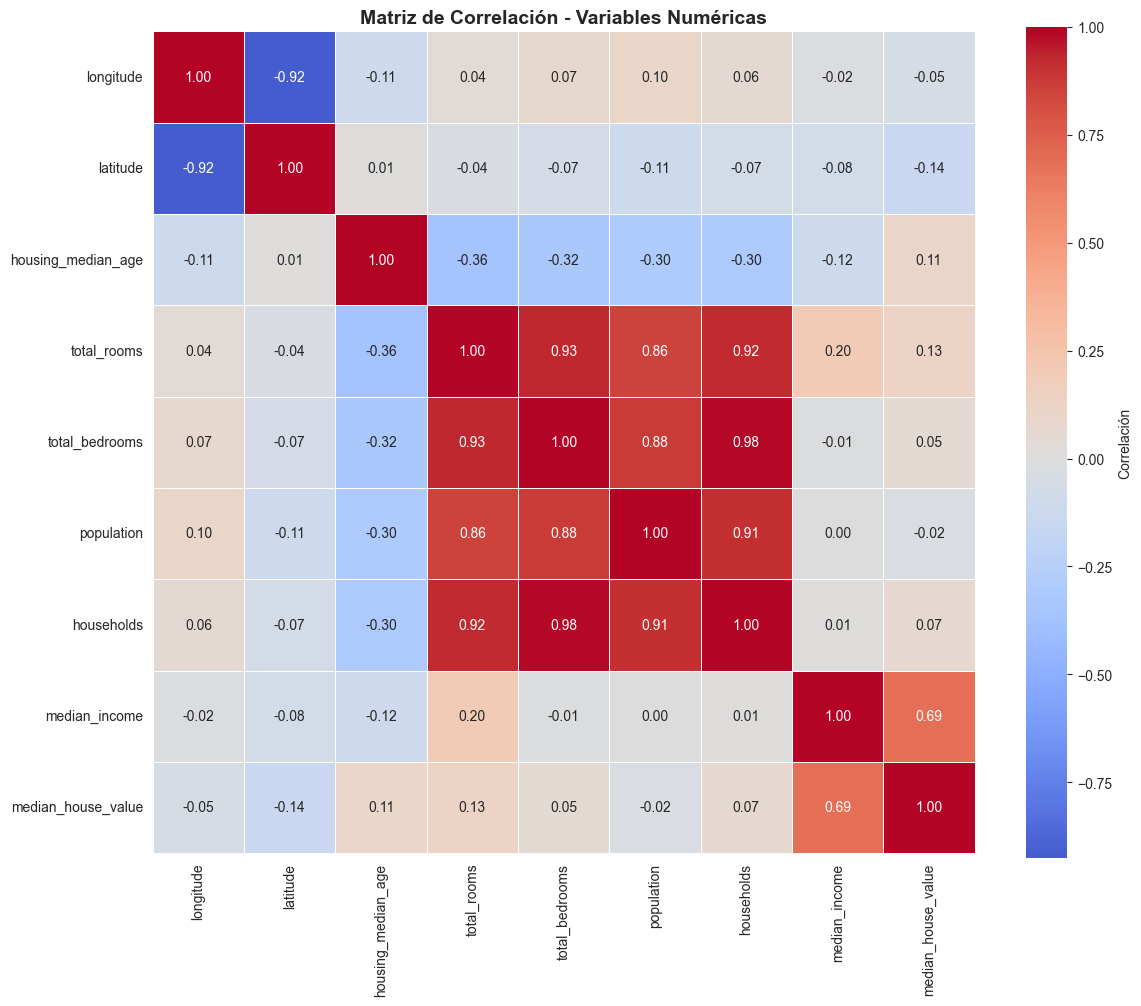


Top 10 correlaciones con median_house_value:
median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64
✓ Guardado: 04_top_correlaciones.png


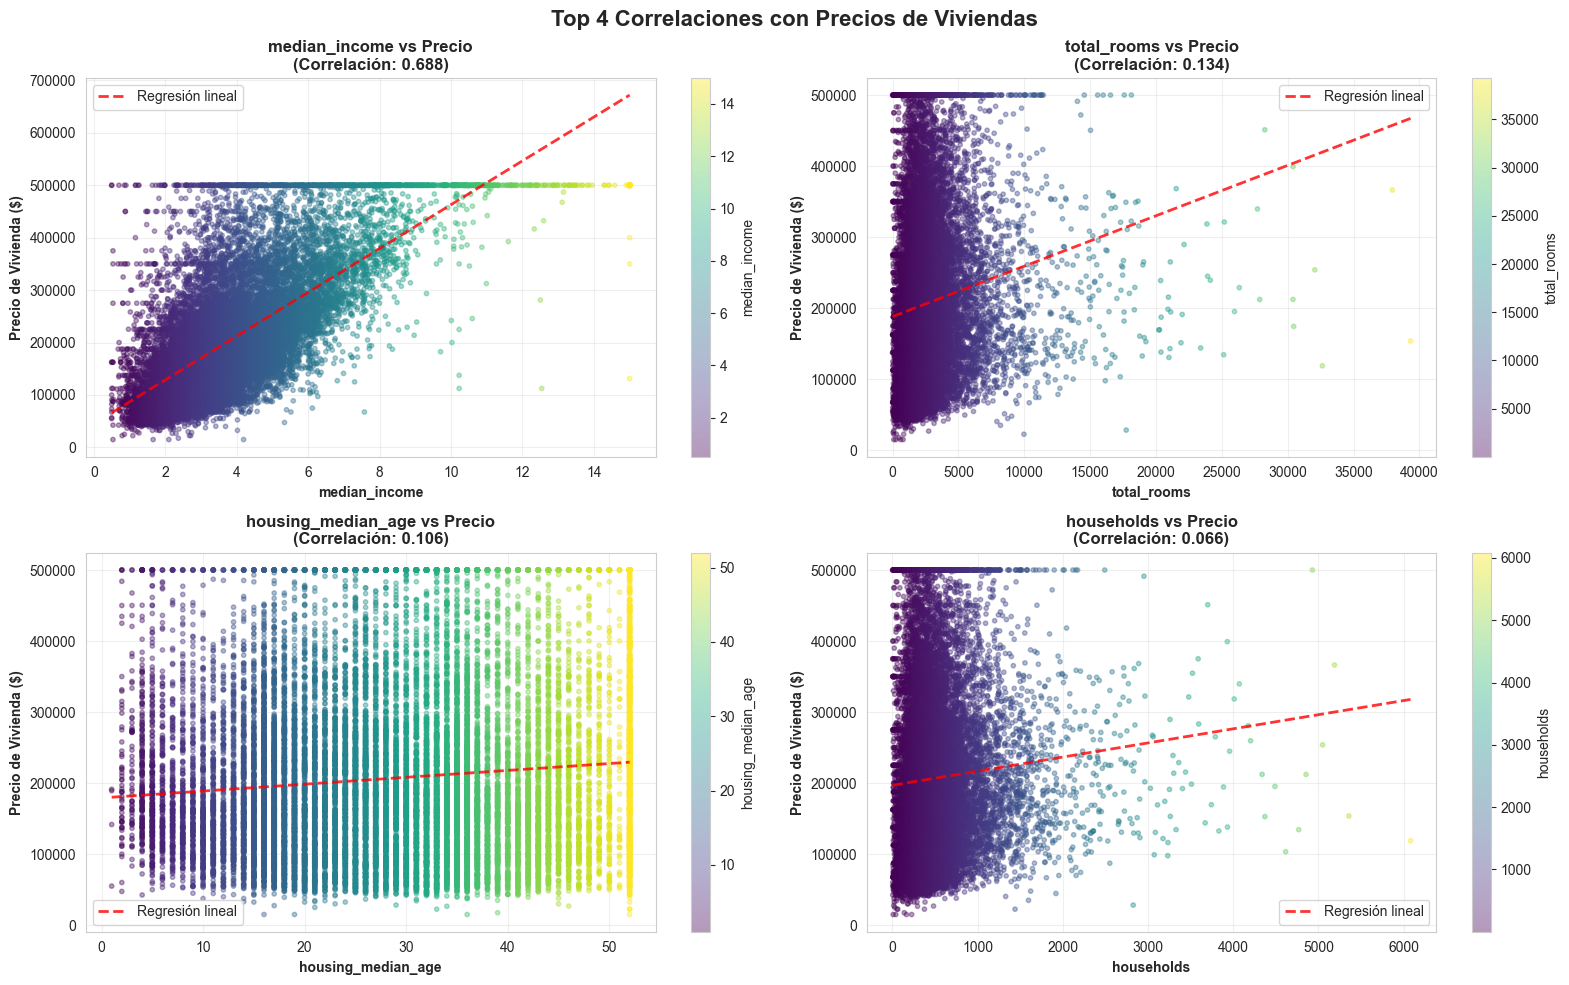


6. ANÁLISIS GEOGRÁFICO
✓ Guardado: 05_analisis_geografico.png


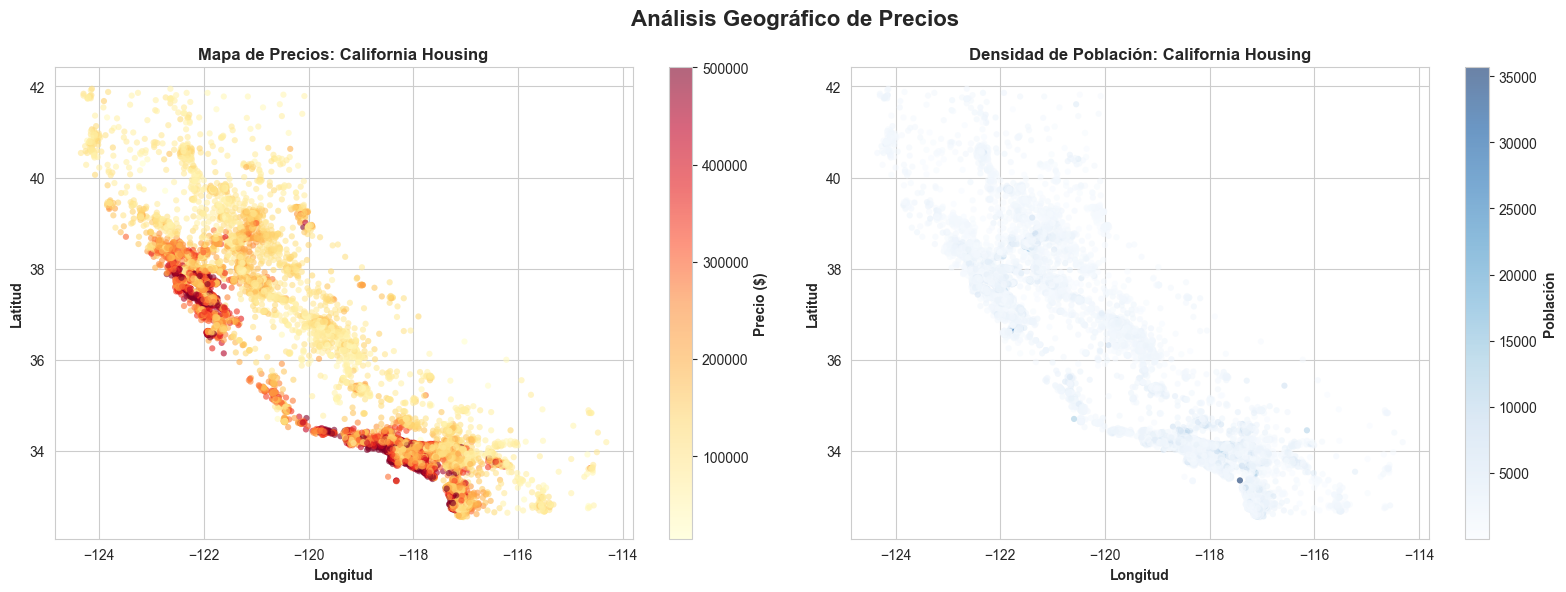


7. ANÁLISIS DE VARIABLE CATEGÓRICA: ocean_proximity
✓ Guardado: 06_analisis_categorico.png


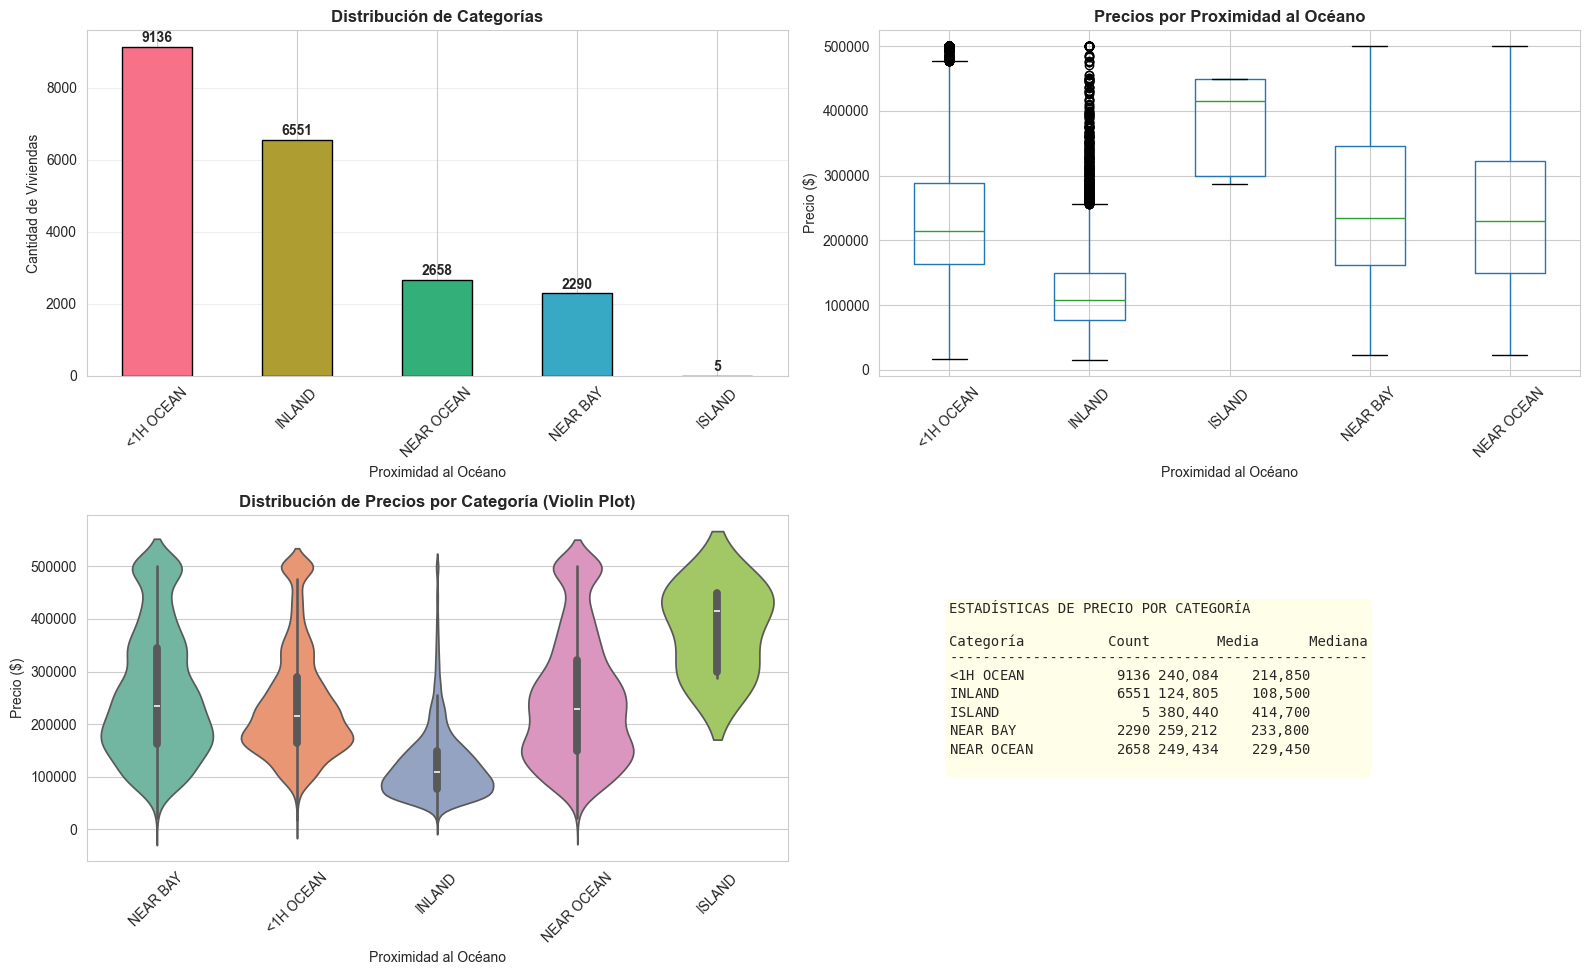


8. ANÁLISIS MULTIVARIADO
✓ Guardado: 07_pairplot.png


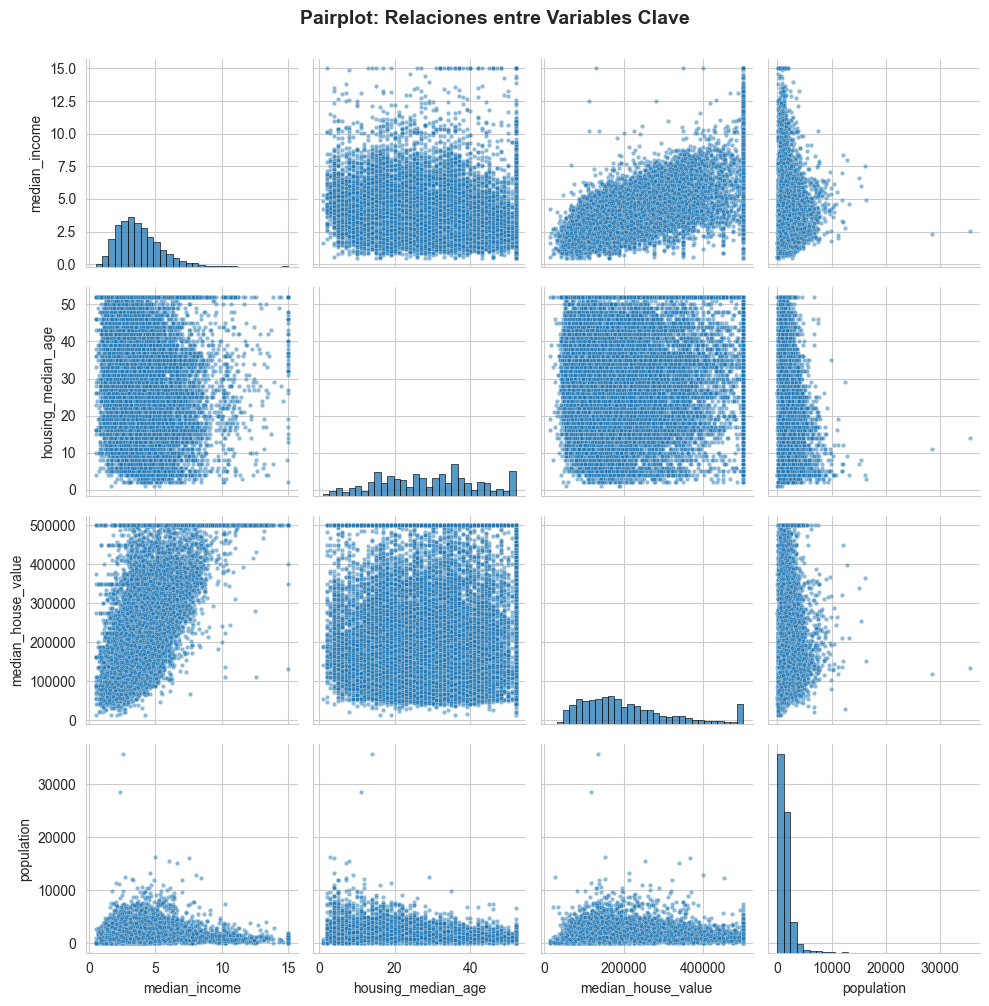

✓ Guardado: 08_analisis_ratios.png


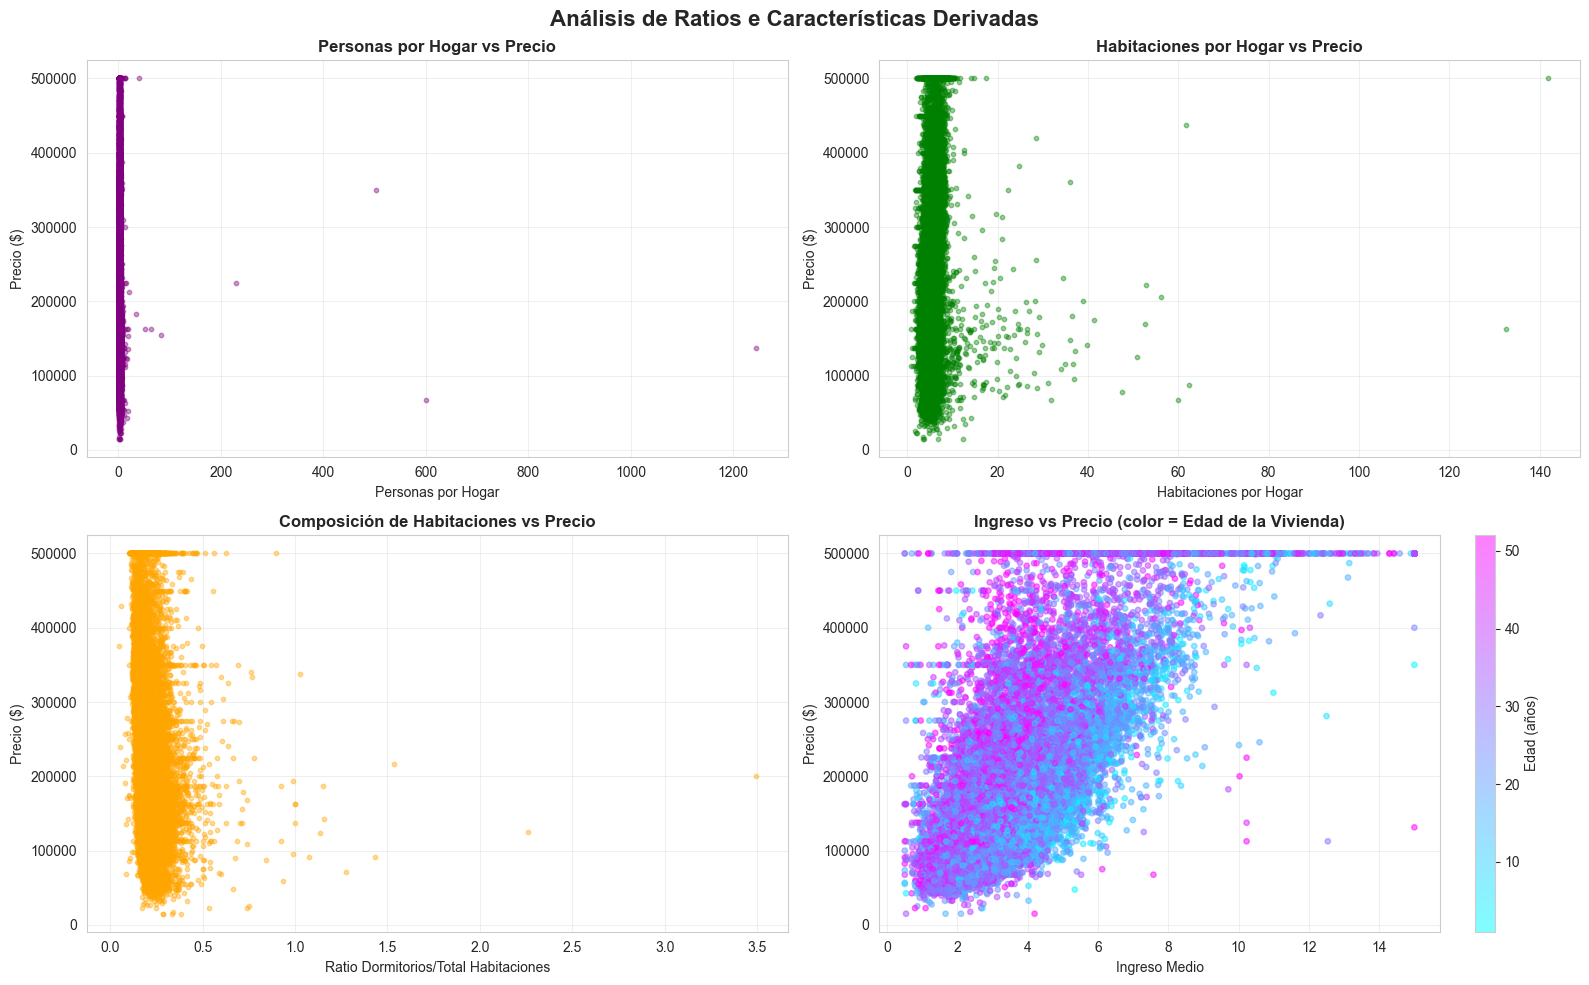


9. RESUMEN DE HALLAZGOS CLAVE

HALLAZGOS PRINCIPALES DEL ANÁLISIS EXPLORATORIO:

1. CARACTERÍSTICAS DEL DATASET:
   - Total de registros: 20,640
   - Total de características: 13
   - Valores faltantes: 207 (principalmente en total_bedrooms)

2. VARIABLE TARGET (median_house_value):
   - Rango: $14,999 - $500,001
   - Media: $206,856
   - Desviación estándar: $115,396
   - Distribución: Ligeramente sesgada a la derecha
   - Outliers detectados: 1071

3. VARIABLES CON MAYOR CORRELACIÓN CON PRECIO:
   - median_income: 0.688
   - total_rooms: 0.134
   - housing_median_age: 0.106

4. ANÁLISIS GEOGRÁFICO:
   - Precios más altos en proximidad al océano (especialmente <1H OCEAN)
   - Patrón claro en el mapa: Zona costera vs interior
   - California tiene mayor densidad de viviendas costeras

5. VARIABLE CATEGÓRICA (ocean_proximity):
   - <1H OCEAN: 44.3% (más caro)
   - INLAND: 31.7% (más barato)
   - NEAR OCEAN: 12.9%
   - NEAR BAY: 11.1%
   - ISLAND: 0.0%

6. RECOMENDACIONES PARA MODELADO:

In [10]:
"""
EXPLORACIÓN COMPLETA DE DATOS - PROYECTO DE PREDICCIÓN DE PRECIOS DE VIVIENDAS
===============================================================================
Este script realiza un análisis exhaustivo del dataset de viviendas de California
"""

from packaging import version
import sklearn
assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Configurar estilo
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 10

# ============================================================================
# 1. CARGAR Y EXPLORACIÓN INICIAL
# ============================================================================
print("=" * 80)
print("1. CARGANDO DATOS")
print("=" * 80)

casas = pd.read_csv('housing_data.csv')

print(f"\nForma del dataset: {casas.shape}")
print(f"\nPrimeras filas:\n{casas.head()}")
print(f"\nInformación del dataset:\n")
casas.info()
print(f"\nEstadísticas descriptivas:\n{casas.describe()}")

# ============================================================================
# 2. ANÁLISIS DE VALORES FALTANTES
# ============================================================================
print("\n" + "=" * 80)
print("2. ANÁLISIS DE VALORES FALTANTES")
print("=" * 80)

valores_faltantes = casas.isnull().sum()
porcentaje_faltantes = (valores_faltantes / len(casas)) * 100

print(f"\nValores faltantes por columna:")
for col in casas.columns:
    if valores_faltantes[col] > 0:
        print(f"  {col}: {valores_faltantes[col]} ({porcentaje_faltantes[col]:.2f}%)")

print(f"\nTotal de filas con al menos un valor faltante: {casas.isnull().any(axis=1).sum()}")

# ============================================================================
# 3. VISUALIZACIONES - PARTE 1: DISTRIBUCIONES UNIVARIADAS
# ============================================================================
print("\n" + "=" * 80)
print("3. VISUALIZANDO DISTRIBUCIONES UNIVARIADAS")
print("=" * 80)

# 3.1 Histogramas con distribución normal superpuesta
fig, axes = plt.subplots(3, 3, figsize=(18, 14))
fig.suptitle('Distribuciones de Características Numéricas', fontsize=16, fontweight='bold')

numerical_cols = casas.select_dtypes(include=[np.number]).columns.tolist()

for idx, col in enumerate(numerical_cols):
    ax = axes[idx // 3, idx % 3]
    
    # Histograma
    ax.hist(casas[col].dropna(), bins=50, alpha=0.7, edgecolor='black', color='skyblue')
    
    # Línea de media
    mean_val = casas[col].mean()
    ax.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Media: {mean_val:.2f}')
    
    # Línea de mediana
    median_val = casas[col].median()
    ax.axvline(median_val, color='green', linestyle='--', linewidth=2, label=f'Mediana: {median_val:.2f}')
    
    ax.set_title(f'{col}', fontweight='bold')
    ax.set_xlabel('Valor')
    ax.set_ylabel('Frecuencia')
    ax.legend()
    ax.grid(alpha=0.3)

# Eliminar el subplot vacío
fig.delaxes(axes[2, 2])
plt.tight_layout()
plt.savefig('img/01_distribuciones_univariadas.png', dpi=300, bbox_inches='tight')
print("✓ Guardado: 01_distribuciones_univariadas.png")
plt.show()

# ============================================================================
# 4. VISUALIZACIONES - PARTE 2: ANÁLISIS DE LA VARIABLE TARGET
# ============================================================================
print("\n" + "=" * 80)
print("4. ANÁLISIS DETALLADO DE LA VARIABLE TARGET (median_house_value)")
print("=" * 80)

fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('Análisis Profundo de Precios de Viviendas', fontsize=16, fontweight='bold')

# 4.1 Histograma con KDE
ax1 = axes[0, 0]
casas['median_house_value'].hist(bins=50, ax=ax1, alpha=0.7, edgecolor='black', color='steelblue')
casas['median_house_value'].plot(kind='kde', ax=ax1, secondary_y=True, color='red', linewidth=2)
ax1.set_title('Distribución de Precios (con KDE)', fontweight='bold')
ax1.set_xlabel('Precio ($)')
ax1.set_ylabel('Frecuencia')
ax1.grid(alpha=0.3)

# 4.2 Boxplot
ax2 = axes[0, 1]
bp = ax2.boxplot(casas['median_house_value'].dropna(), vert=True, patch_artist=True)
bp['boxes'][0].set_facecolor('lightblue')
ax2.set_title('Boxplot de Precios (Detección de Outliers)', fontweight='bold')
ax2.set_ylabel('Precio ($)')
ax2.grid(alpha=0.3, axis='y')

# Estadísticas de outliers
Q1 = casas['median_house_value'].quantile(0.25)
Q3 = casas['median_house_value'].quantile(0.75)
IQR = Q3 - Q1
outliers = casas[(casas['median_house_value'] < Q1 - 1.5*IQR) | (casas['median_house_value'] > Q3 + 1.5*IQR)]
ax2.text(1.15, Q3, f'Q3: ${Q3:,.0f}\nOutliers: {len(outliers)}', fontsize=10, 
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# 4.3 Q-Q Plot (para ver normalidad)
ax3 = axes[1, 0]
stats.probplot(casas['median_house_value'].dropna(), dist="norm", plot=ax3)
ax3.set_title('Q-Q Plot (Evaluando Normalidad)', fontweight='bold')
ax3.grid(alpha=0.3)

# 4.4 Estadísticas descriptivas en tabla
ax4 = axes[1, 1]
ax4.axis('off')
stats_data = casas['median_house_value'].describe()
stats_text = f"""
ESTADÍSTICAS DE PRECIOS DE VIVIENDAS

Cantidad:        {int(stats_data['count']):,}
Media:           ${stats_data['mean']:,.0f}
Desv. Estándar:  ${stats_data['std']:,.0f}
Mínimo:          ${stats_data['min']:,.0f}
Q1 (25%):        ${casas['median_house_value'].quantile(0.25):,.0f}
Mediana (50%):   ${stats_data['50%']:,.0f}
Q3 (75%):        ${casas['median_house_value'].quantile(0.75):,.0f}
Máximo:          ${stats_data['max']:,.0f}
IQR:             ${IQR:,.0f}
Skewness:        {stats.skew(casas['median_house_value'].dropna()):.3f}
Kurtosis:        {stats.kurtosis(casas['median_house_value'].dropna()):.3f}
"""
ax4.text(0.1, 0.5, stats_text, fontsize=11, family='monospace',
         bbox=dict(boxstyle='round', facecolor='lightgray', alpha=0.7),
         verticalalignment='center')

plt.tight_layout()
plt.savefig('img/02_analisis_target.png', dpi=300, bbox_inches='tight')
print("✓ Guardado: 02_analisis_target.png")
plt.show()

# ============================================================================
# 5. VISUALIZACIONES - PARTE 3: CORRELACIONES
# ============================================================================
print("\n" + "=" * 80)
print("5. ANÁLISIS DE CORRELACIONES")
print("=" * 80)

# 5.1 Heatmap de correlaciones
fig, ax = plt.subplots(figsize=(12, 10))
corr_matrix = casas.corr(numeric_only=True)
sns.heatmap(corr_matrix, 
            annot=True,
            cmap='coolwarm',
            center=0,
            fmt='.2f',
            square=True,
            linewidths=0.5,
            cbar_kws={'label': 'Correlación'},
            ax=ax)
plt.title('Matriz de Correlación - Variables Numéricas', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('img/03_matriz_correlacion.png', dpi=300, bbox_inches='tight')
print("✓ Guardado: 03_matriz_correlacion.png")
plt.show()

# 5.2 Top correlaciones con target
print("\nTop 10 correlaciones con median_house_value:")
correlations_with_target = corr_matrix['median_house_value'].sort_values(ascending=False)
print(correlations_with_target)

# 5.3 Visualizar top correlaciones
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('Top 4 Correlaciones con Precios de Viviendas', fontsize=16, fontweight='bold')

top_features = correlations_with_target[1:5].index  # Excluir la diagonal

for idx, feature in enumerate(top_features):
    ax = axes[idx // 2, idx % 2]
    
    # Scatter plot con densidad de color
    scatter = ax.scatter(casas[feature], casas['median_house_value'], 
                        alpha=0.4, s=10, c=casas[feature], cmap='viridis')
    
    # Línea de regresión
    z = np.polyfit(casas[feature].dropna(), casas['median_house_value'].dropna(), 1)
    p = np.poly1d(z)
    x_line = np.linspace(casas[feature].min(), casas[feature].max(), 100)
    ax.plot(x_line, p(x_line), "r--", linewidth=2, alpha=0.8, label='Regresión lineal')
    
    # Calcular correlación
    corr = casas[feature].corr(casas['median_house_value'])
    
    ax.set_xlabel(feature, fontweight='bold')
    ax.set_ylabel('Precio de Vivienda ($)', fontweight='bold')
    ax.set_title(f'{feature} vs Precio\n(Correlación: {corr:.3f})', fontweight='bold')
    ax.grid(alpha=0.3)
    ax.legend()
    plt.colorbar(scatter, ax=ax, label=feature)

plt.tight_layout()
plt.savefig('img/04_top_correlaciones.png', dpi=300, bbox_inches='tight')
print("✓ Guardado: 04_top_correlaciones.png")
plt.show()

# ============================================================================
# 6. VISUALIZACIONES - PARTE 4: ANÁLISIS GEOGRÁFICO
# ============================================================================
print("\n" + "=" * 80)
print("6. ANÁLISIS GEOGRÁFICO")
print("=" * 80)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Análisis Geográfico de Precios', fontsize=16, fontweight='bold')

# 6.1 Scatter plot: Ubicación geográfica coloreada por precio
ax1 = axes[0]
scatter1 = ax1.scatter(casas['longitude'], casas['latitude'], 
                       c=casas['median_house_value'], 
                       s=20, alpha=0.6, cmap='YlOrRd', edgecolors='none')
ax1.set_xlabel('Longitud', fontweight='bold')
ax1.set_ylabel('Latitud', fontweight='bold')
ax1.set_title('Mapa de Precios: California Housing', fontweight='bold')
cbar1 = plt.colorbar(scatter1, ax=ax1)
cbar1.set_label('Precio ($)', fontweight='bold')

# 6.2 Scatter plot: Ubicación geográfica coloreada por población
ax2 = axes[1]
scatter2 = ax2.scatter(casas['longitude'], casas['latitude'], 
                       c=casas['population'], 
                       s=20, alpha=0.6, cmap='Blues', edgecolors='none')
ax2.set_xlabel('Longitud', fontweight='bold')
ax2.set_ylabel('Latitud', fontweight='bold')
ax2.set_title('Densidad de Población: California Housing', fontweight='bold')
cbar2 = plt.colorbar(scatter2, ax=ax2)
cbar2.set_label('Población', fontweight='bold')

plt.tight_layout()
plt.savefig('img/05_analisis_geografico.png', dpi=300, bbox_inches='tight')
print("✓ Guardado: 05_analisis_geografico.png")
plt.show()

# ============================================================================
# 7. VISUALIZACIONES - PARTE 5: ANÁLISIS DE VARIABLES CATEGÓRICAS
# ============================================================================
print("\n" + "=" * 80)
print("7. ANÁLISIS DE VARIABLE CATEGÓRICA: ocean_proximity")
print("=" * 80)

fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('Análisis de Proximidad al Océano', fontsize=16, fontweight='bold')

# 7.1 Conteo de categorías
ax1 = axes[0, 0]
ocean_counts = casas['ocean_proximity'].value_counts()
colors = sns.color_palette('husl', len(ocean_counts))
ocean_counts.plot(kind='bar', ax=ax1, color=colors, edgecolor='black')
ax1.set_title('Distribución de Categorías', fontweight='bold')
ax1.set_ylabel('Cantidad de Viviendas')
ax1.set_xlabel('Proximidad al Océano')
ax1.tick_params(axis='x', rotation=45)
for i, v in enumerate(ocean_counts):
    ax1.text(i, v + 50, str(v), ha='center', va='bottom', fontweight='bold')
ax1.grid(alpha=0.3, axis='y')

# 7.2 Boxplot de precios por categoría
ax2 = axes[0, 1]
casas.boxplot(column='median_house_value', by='ocean_proximity', ax=ax2)
ax2.set_title('Precios por Proximidad al Océano', fontweight='bold')
ax2.set_ylabel('Precio ($)')
ax2.set_xlabel('Proximidad al Océano')
plt.sca(ax2)
plt.xticks(rotation=45)
ax2.get_figure().suptitle('')  # Remover título automático

# 7.3 Violin plot
ax3 = axes[1, 0]
sns.violinplot(data=casas, x='ocean_proximity', y='median_house_value', ax=ax3, palette='Set2')
ax3.set_title('Distribución de Precios por Categoría (Violin Plot)', fontweight='bold')
ax3.set_ylabel('Precio ($)')
ax3.set_xlabel('Proximidad al Océano')
ax3.tick_params(axis='x', rotation=45)

# 7.4 Estadísticas por categoría
ax4 = axes[1, 1]
ax4.axis('off')

stats_by_category = casas.groupby('ocean_proximity')['median_house_value'].agg([
    'count', 'mean', 'median', 'std', 'min', 'max'
])

table_text = "ESTADÍSTICAS DE PRECIO POR CATEGORÍA\n\n"
table_text += f"{'Categoría':<15} {'Count':>8} {'Media':>12} {'Mediana':>12}\n"
table_text += "-" * 50 + "\n"

for idx, row in stats_by_category.iterrows():
    table_text += f"{idx:<15} {int(row['count']):>8} ${row['mean']:>11,.0f} ${row['median']:>11,.0f}\n"

ax4.text(0.1, 0.5, table_text, fontsize=10, family='monospace',
         bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.7),
         verticalalignment='center')

plt.tight_layout()
plt.savefig('img/06_analisis_categorico.png', dpi=300, bbox_inches='tight')
print("✓ Guardado: 06_analisis_categorico.png")
plt.show()

# ============================================================================
# 8. VISUALIZACIONES - PARTE 6: ANÁLISIS DE RELACIONES MULTIVARIADAS
# ============================================================================
print("\n" + "=" * 80)
print("8. ANÁLISIS MULTIVARIADO")
print("=" * 80)

# 8.1 Pairplot de variables clave
key_features = ['median_income', 'housing_median_age', 'median_house_value', 'population']
pairplot = sns.pairplot(casas[key_features], 
                        diag_kind='hist', 
                        plot_kws={'alpha': 0.5, 's': 10},
                        diag_kws={'bins': 30, 'edgecolor': 'black'})
pairplot.fig.suptitle('Pairplot: Relaciones entre Variables Clave', 
                      fontsize=14, fontweight='bold', y=1.001)
plt.tight_layout()
plt.savefig('img/07_pairplot.png', dpi=300, bbox_inches='tight')
print("✓ Guardado: 07_pairplot.png")
plt.show()

# 8.2 Análisis de ratios interesantes
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('Análisis de Ratios e Características Derivadas', fontsize=16, fontweight='bold')

# Ratio: personas por hogar
casas['persons_per_household'] = casas['population'] / casas['households']
ax1 = axes[0, 0]
ax1.scatter(casas['persons_per_household'], casas['median_house_value'], 
           alpha=0.4, s=10, c='purple')
ax1.set_xlabel('Personas por Hogar')
ax1.set_ylabel('Precio ($)')
ax1.set_title('Personas por Hogar vs Precio', fontweight='bold')
ax1.grid(alpha=0.3)

# Ratio: habitaciones por hogar
casas['rooms_per_household'] = casas['total_rooms'] / casas['households']
ax2 = axes[0, 1]
ax2.scatter(casas['rooms_per_household'], casas['median_house_value'], 
           alpha=0.4, s=10, c='green')
ax2.set_xlabel('Habitaciones por Hogar')
ax2.set_ylabel('Precio ($)')
ax2.set_title('Habitaciones por Hogar vs Precio', fontweight='bold')
ax2.grid(alpha=0.3)

# Ratio: dormitorios por total de habitaciones
casas['bedrooms_ratio'] = casas['total_bedrooms'].fillna(casas['total_bedrooms'].mean()) / casas['total_rooms']
ax3 = axes[1, 0]
ax3.scatter(casas['bedrooms_ratio'], casas['median_house_value'], 
           alpha=0.4, s=10, c='orange')
ax3.set_xlabel('Ratio Dormitorios/Total Habitaciones')
ax3.set_ylabel('Precio ($)')
ax3.set_title('Composición de Habitaciones vs Precio', fontweight='bold')
ax3.grid(alpha=0.3)

# Ingreso vs Precio (con color por edad)
ax4 = axes[1, 1]
scatter = ax4.scatter(casas['median_income'], casas['median_house_value'], 
                     c=casas['housing_median_age'], cmap='cool', alpha=0.5, s=15)
ax4.set_xlabel('Ingreso Medio')
ax4.set_ylabel('Precio ($)')
ax4.set_title('Ingreso vs Precio (color = Edad de la Vivienda)', fontweight='bold')
cbar = plt.colorbar(scatter, ax=ax4)
cbar.set_label('Edad (años)')
ax4.grid(alpha=0.3)

plt.tight_layout()
plt.savefig('img/08_analisis_ratios.png', dpi=300, bbox_inches='tight')
print("✓ Guardado: 08_analisis_ratios.png")
plt.show()

# ============================================================================
# 9. RESUMEN Y CONCLUSIONES
# ============================================================================
print("\n" + "=" * 80)
print("9. RESUMEN DE HALLAZGOS CLAVE")
print("=" * 80)

summary = f"""
HALLAZGOS PRINCIPALES DEL ANÁLISIS EXPLORATORIO:

1. CARACTERÍSTICAS DEL DATASET:
   - Total de registros: {len(casas):,}
   - Total de características: {casas.shape[1]}
   - Valores faltantes: {casas.isnull().sum().sum()} (principalmente en total_bedrooms)

2. VARIABLE TARGET (median_house_value):
   - Rango: ${casas['median_house_value'].min():,.0f} - ${casas['median_house_value'].max():,.0f}
   - Media: ${casas['median_house_value'].mean():,.0f}
   - Desviación estándar: ${casas['median_house_value'].std():,.0f}
   - Distribución: Ligeramente sesgada a la derecha
   - Outliers detectados: {len(outliers)}

3. VARIABLES CON MAYOR CORRELACIÓN CON PRECIO:
   - {correlations_with_target.index[1]}: {correlations_with_target.values[1]:.3f}
   - {correlations_with_target.index[2]}: {correlations_with_target.values[2]:.3f}
   - {correlations_with_target.index[3]}: {correlations_with_target.values[3]:.3f}

4. ANÁLISIS GEOGRÁFICO:
   - Precios más altos en proximidad al océano (especialmente <1H OCEAN)
   - Patrón claro en el mapa: Zona costera vs interior
   - California tiene mayor densidad de viviendas costeras

5. VARIABLE CATEGÓRICA (ocean_proximity):
   - <1H OCEAN: {(ocean_counts['<1H OCEAN']/len(casas)*100):.1f}% (más caro)
   - INLAND: {(ocean_counts['INLAND']/len(casas)*100):.1f}% (más barato)
   - NEAR OCEAN: {(ocean_counts['NEAR OCEAN']/len(casas)*100):.1f}%
   - NEAR BAY: {(ocean_counts['NEAR BAY']/len(casas)*100):.1f}%
   - ISLAND: {(ocean_counts['ISLAND']/len(casas)*100):.1f}%

6. RECOMENDACIONES PARA MODELADO:
   - Escalar características numéricas (rango muy diferente)
   - One-hot encoding para ocean_proximity
   - Manejar valores faltantes en total_bedrooms
   - Considerar transformaciones para normalizar target
   - Investigar interacciones entre variables (ej: ingreso + ubicación)
   - Posibles outliers por detectar y manejar
"""

print(summary)

# Guardar resumen en archivo
with open('img/resumen_exploracion.txt', 'w') as f:
    f.write(summary)

print("\n✓ Guardado: resumen_exploracion.txt")
print("\n" + "=" * 80)
print("EXPLORACIÓN COMPLETADA")
print("=" * 80)
print("\nArchivos generados:")
print("  1. 01_distribuciones_univariadas.png")
print("  2. 02_analisis_target.png")
print("  3. 03_matriz_correlacion.png")
print("  4. 04_top_correlaciones.png")
print("  5. 05_analisis_geografico.png")
print("  6. 06_analisis_categorico.png")
print("  7. 07_pairplot.png")
print("  8. 08_analisis_ratios.png")
print("  9. resumen_exploracion.txt")

In [11]:
"""
PROYECTO COMPLETO DE ML: PREDICCIÓN DE PRECIOS DE VIVIENDAS
===========================================================
Fases: Preprocesamiento → Modelado → Evaluación
"""

from packaging import version
import sklearn
assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings('ignore')

# Configurar estilo
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 8)

print("=" * 100)
print("PROYECTO COMPLETO: PREDICCIÓN DE PRECIOS DE VIVIENDAS EN CALIFORNIA")
print("=" * 100)


PROYECTO COMPLETO: PREDICCIÓN DE PRECIOS DE VIVIENDAS EN CALIFORNIA


In [12]:

# ============================================================================
# FASE 2: PREPROCESAMIENTO
# ============================================================================
print("\n" + "=" * 100)
print("FASE 2: PREPROCESAMIENTO")
print("=" * 100)

# 2.1 Cargar datos
print("\n[2.1] Cargando datos...")
casas = pd.read_csv('housing_data.csv')
print(f"✓ Datos cargados: {casas.shape[0]} registros × {casas.shape[1]} características")

# 2.2 Separar features y target
print("\n[2.2] Separando features y target...")
X = casas.drop('median_house_value', axis=1)
y = casas['median_house_value']
print(f"✓ X: {X.shape}")
print(f"✓ y: {y.shape}")

# 2.3 División train/test
print("\n[2.3] Dividiendo datos (80-20)...")
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print(f"✓ Train: {X_train.shape[0]} registros")
print(f"✓ Test: {X_test.shape[0]} registros")

# 2.4 Crear transformador de preprocesamiento
print("\n[2.4] Creando pipeline de preprocesamiento...")

# Identificar columnas numéricas y categóricas
numeric_cols = X_train.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_cols = X_train.select_dtypes(include=['object']).columns.tolist()

print(f"✓ Columnas numéricas ({len(numeric_cols)}): {numeric_cols}")
print(f"✓ Columnas categóricas ({len(categorical_cols)}): {categorical_cols}")

# Imputar valores faltantes en total_bedrooms
from sklearn.impute import SimpleImputer

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(drop='first', sparse_output=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

print("✓ Pipeline de preprocesamiento creado")


FASE 2: PREPROCESAMIENTO

[2.1] Cargando datos...
✓ Datos cargados: 20640 registros × 10 características

[2.2] Separando features y target...
✓ X: (20640, 9)
✓ y: (20640,)

[2.3] Dividiendo datos (80-20)...
✓ Train: 16512 registros
✓ Test: 4128 registros

[2.4] Creando pipeline de preprocesamiento...
✓ Columnas numéricas (8): ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']
✓ Columnas categóricas (1): ['ocean_proximity']
✓ Pipeline de preprocesamiento creado


In [13]:
# 2.5 Aplicar transformaciones
print("\n[2.5] Aplicando transformaciones...")
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

print(f"✓ X_train transformado: {X_train_processed.shape}")
print(f"✓ X_test transformado: {X_test_processed.shape}")

# Obtener nombres de features después de transformación
feature_names = (
    numeric_cols + 
    list(preprocessor.named_transformers_['cat']
         .named_steps['encoder']
         .get_feature_names_out(categorical_cols))
)
print(f"✓ Total features después de preprocesamiento: {len(feature_names)}")


[2.5] Aplicando transformaciones...
✓ X_train transformado: (16512, 12)
✓ X_test transformado: (4128, 12)
✓ Total features después de preprocesamiento: 12


In [14]:
# ============================================================================
# FASE 3: MODELADO
# ============================================================================
print("\n" + "=" * 100)
print("FASE 3: MODELADO")
print("=" * 100)

# 3.1 Definir modelos
print("\n[3.1] Definiendo modelos...")

models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
}

print(f"✓ Modelos a entrenar: {list(models.keys())}")

# 3.2 Entrenar modelos con validación cruzada
print("\n[3.2] Entrenando modelos con validación cruzada (cv=5)...")
cv_results = {}

for name, model in models.items():
    print(f"\n  Entrenando {name}...")
    
    # Validación cruzada
    cv_scores = cross_validate(
        model, X_train_processed, y_train,
        cv=5,
        scoring=['r2', 'neg_mean_squared_error', 'neg_mean_absolute_error'],
        return_train_score=True
    )
    
    # Guardar resultados
    cv_results[name] = cv_scores
    
    # Mostrar métricas
    r2_train = cv_scores['train_r2'].mean()
    r2_test = cv_scores['test_r2'].mean()
    rmse_test = np.sqrt(-cv_scores['test_neg_mean_squared_error'].mean())
    mae_test = -cv_scores['test_neg_mean_absolute_error'].mean()
    
    print(f"    ├─ R² Train: {r2_train:.4f} (+/- {cv_scores['train_r2'].std():.4f})")
    print(f"    ├─ R² Test:  {r2_test:.4f} (+/- {cv_scores['test_r2'].std():.4f})")
    print(f"    ├─ RMSE:     ${rmse_test:,.0f}")
    print(f"    └─ MAE:      ${mae_test:,.0f}")

# 3.3 Entrenar modelos finales en todo el conjunto train
print("\n[3.3] Entrenando modelos finales en train completo...")
trained_models = {}

for name, model in models.items():
    print(f"  ✓ Entrenando {name}...")
    model.fit(X_train_processed, y_train)
    trained_models[name] = model


FASE 3: MODELADO

[3.1] Definiendo modelos...
✓ Modelos a entrenar: ['Linear Regression', 'Ridge Regression', 'Random Forest']

[3.2] Entrenando modelos con validación cruzada (cv=5)...

  Entrenando Linear Regression...
    ├─ R² Train: 0.6445 (+/- 0.0032)
    ├─ R² Test:  0.6427 (+/- 0.0129)
    ├─ RMSE:     $68,604
    └─ MAE:      $49,627

  Entrenando Ridge Regression...
    ├─ R² Train: 0.6444 (+/- 0.0032)
    ├─ R² Test:  0.6426 (+/- 0.0129)
    ├─ RMSE:     $68,606
    └─ MAE:      $49,631

  Entrenando Random Forest...
    ├─ R² Train: 0.9742 (+/- 0.0003)
    ├─ R² Test:  0.8153 (+/- 0.0050)
    ├─ RMSE:     $49,316
    └─ MAE:      $32,277

[3.3] Entrenando modelos finales en train completo...
  ✓ Entrenando Linear Regression...
  ✓ Entrenando Ridge Regression...
  ✓ Entrenando Random Forest...



FASE 4: EVALUACIÓN Y ANÁLISIS

[4.1] Generando predicciones en conjunto test...
✓ Predicciones de Linear Regression generadas
✓ Predicciones de Ridge Regression generadas
✓ Predicciones de Random Forest generadas

[4.2] Calculando métricas de evaluación...

  Linear Regression:
    ├─ RMSE:  $69,791
    ├─ MAE:   $50,753
    ├─ R²:    0.6486
    └─ MAPE:  28.43%

  Ridge Regression:
    ├─ RMSE:  $69,792
    ├─ MAE:   $50,756
    ├─ R²:    0.6486
    └─ MAPE:  28.43%

  Random Forest:
    ├─ RMSE:  $49,392
    ├─ MAE:   $31,902
    ├─ R²:    0.8240
    └─ MAPE:  17.20%

[4.3] COMPARACIÓN DE MODELOS
----------------------------------------------------------------------------------------------------
                      RMSE      MAE      R2    MAPE
Linear Regression  $69,791  $50,753  0.6486  28.43%
Ridge Regression   $69,792  $50,756  0.6486  28.43%
Random Forest      $49,392  $31,902  0.8240  17.20%

🏆 Mejor modelo: Random Forest (R² = 0.8240)

[4.4] Análisis de Errores
------------

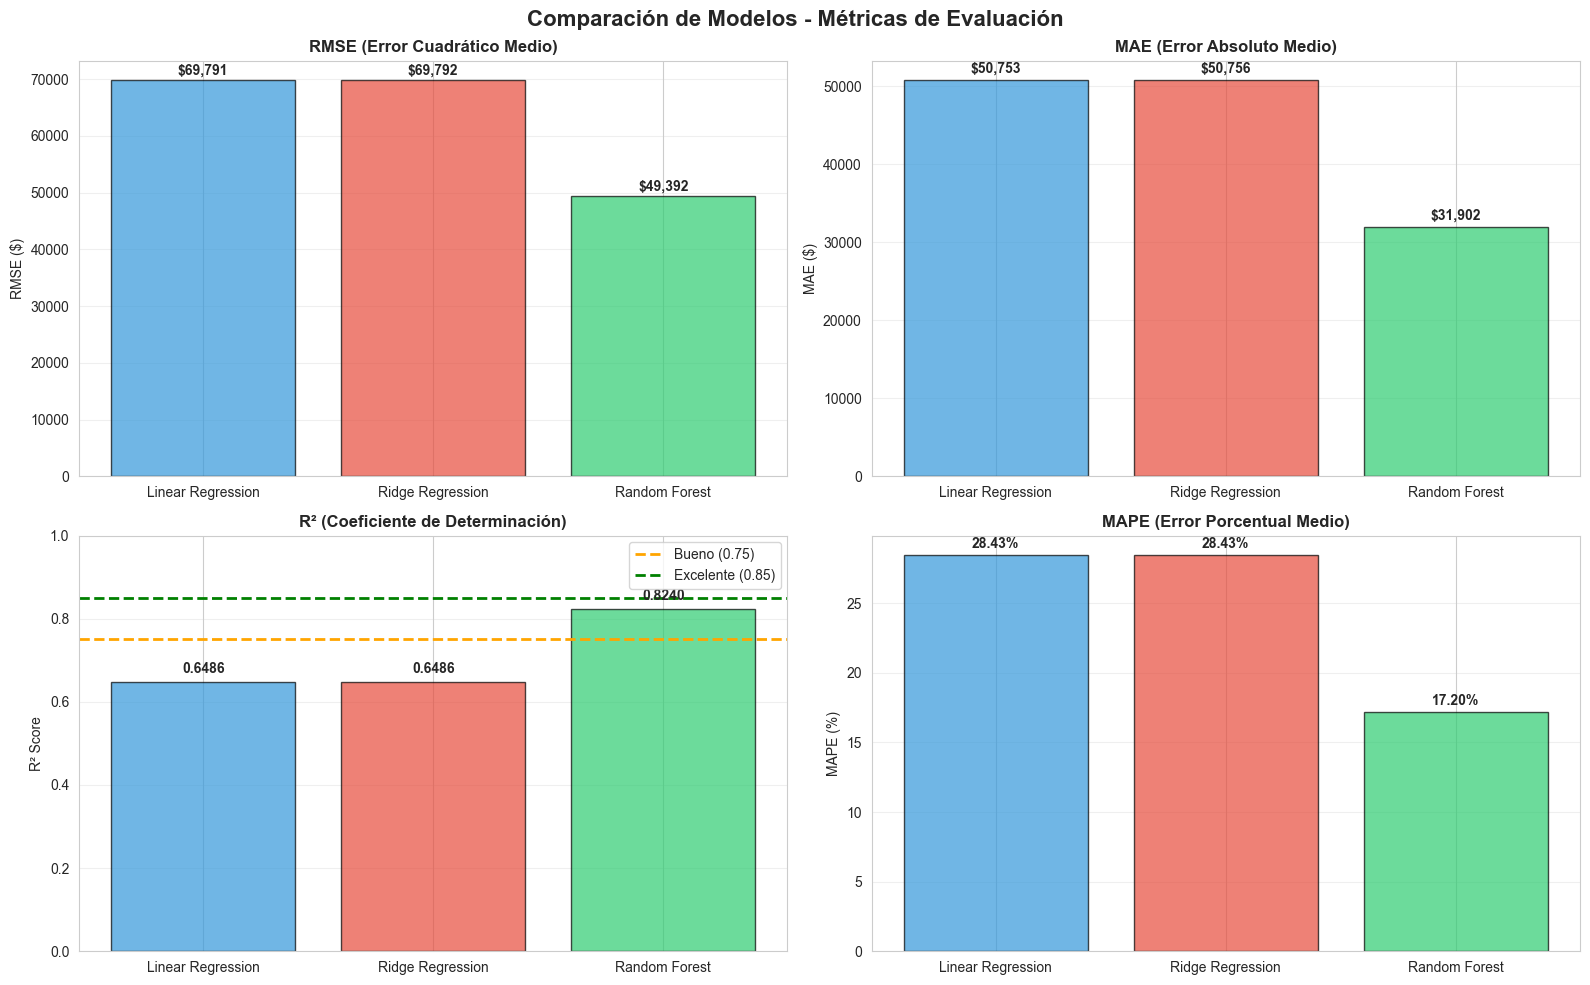

✓ Guardado: 11_predicciones_vs_reales.png


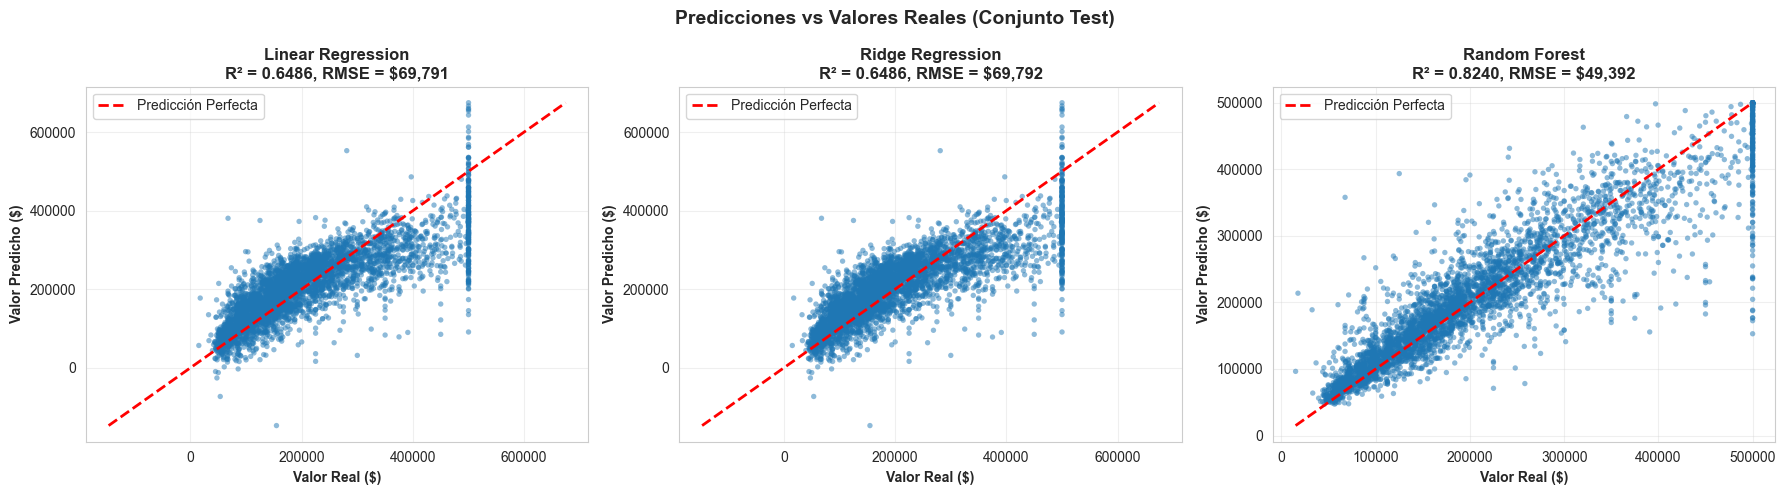

✓ Guardado: 12_analisis_residuos.png


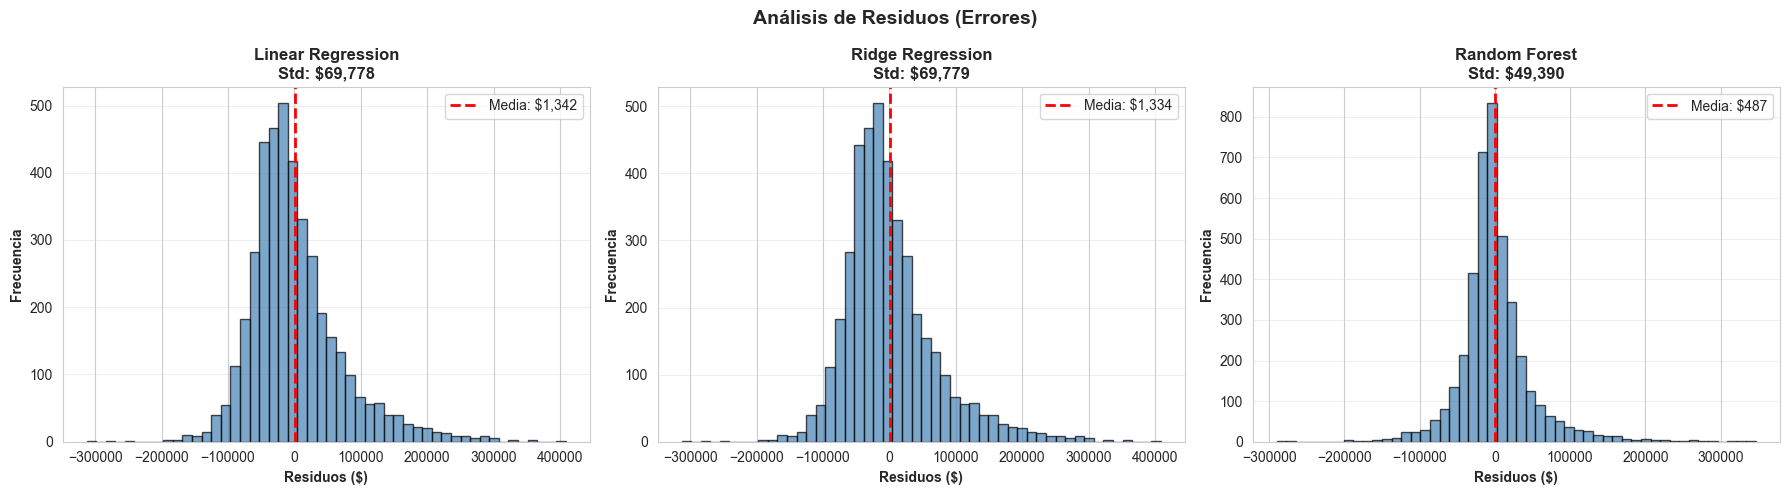


[4.6] Calculando importancia de características (Random Forest)...
✓ Guardado: 13_feature_importance.png


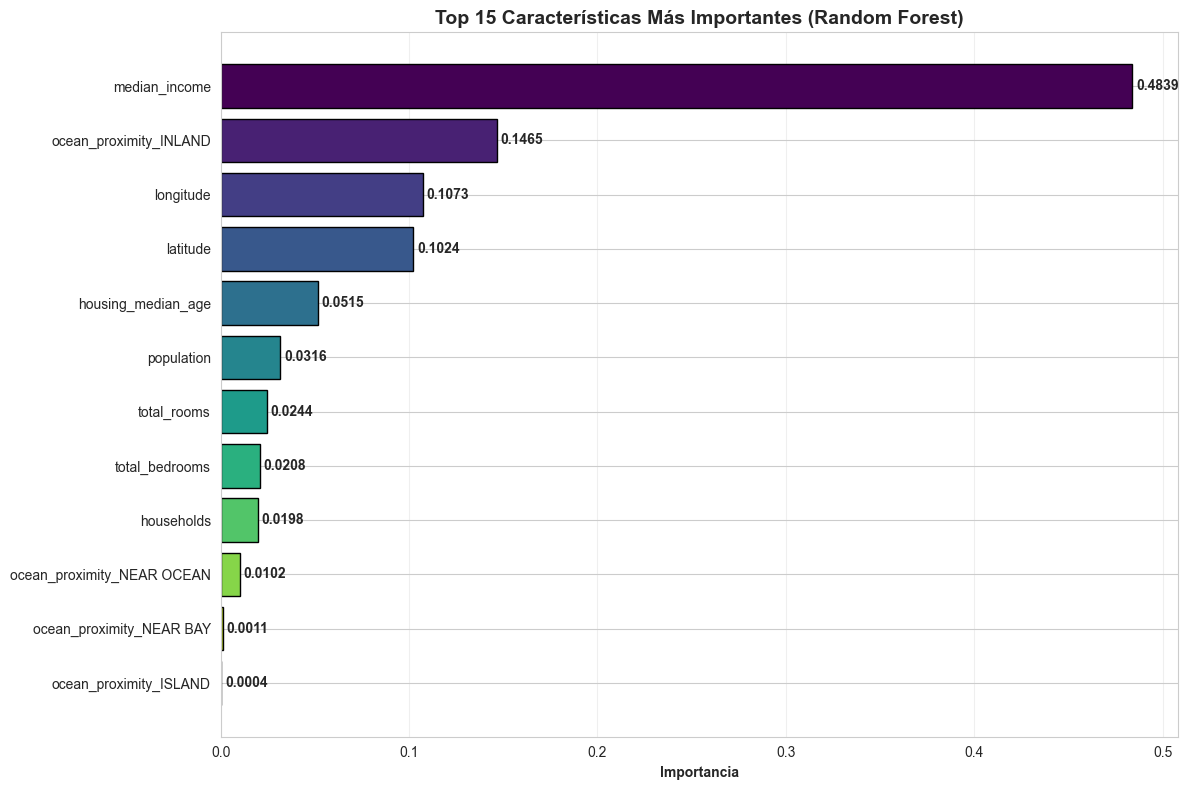

In [16]:


# ============================================================================
# FASE 4: EVALUACIÓN
# ============================================================================
print("\n" + "=" * 100)
print("FASE 4: EVALUACIÓN Y ANÁLISIS")
print("=" * 100)

# 4.1 Predicciones en test
print("\n[4.1] Generando predicciones en conjunto test...")
predictions = {}

for name, model in trained_models.items():
    y_pred = model.predict(X_test_processed)
    predictions[name] = y_pred
    print(f"✓ Predicciones de {name} generadas")

# 4.2 Calcular métricas
print("\n[4.2] Calculando métricas de evaluación...")

evaluation_results = {}

for name, y_pred in predictions.items():
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Error porcentual medio (MAPE)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    
    evaluation_results[name] = {
        'RMSE': rmse,
        'MAE': mae,
        'R2': r2,
        'MAPE': mape
    }
    
    print(f"\n  {name}:")
    print(f"    ├─ RMSE:  ${rmse:,.0f}")
    print(f"    ├─ MAE:   ${mae:,.0f}")
    print(f"    ├─ R²:    {r2:.4f}")
    print(f"    └─ MAPE:  {mape:.2f}%")

# 4.3 Comparación de modelos
print("\n[4.3] COMPARACIÓN DE MODELOS")
print("-" * 100)

eval_df = pd.DataFrame(evaluation_results).T
eval_df = eval_df.round(4)
eval_df['RMSE'] = eval_df['RMSE'].apply(lambda x: f"${x:,.0f}")
eval_df['MAE'] = eval_df['MAE'].apply(lambda x: f"${x:,.0f}")
eval_df['MAPE'] = eval_df['MAPE'].apply(lambda x: f"{x:.2f}%")

print(eval_df.to_string())

# Identificar mejor modelo
best_model_name = max(evaluation_results, key=lambda x: evaluation_results[x]['R2'])
best_r2 = evaluation_results[best_model_name]['R2']

print(f"\n🏆 Mejor modelo: {best_model_name} (R² = {best_r2:.4f})")

# ============================================================================
# 4.4 ANÁLISIS DE ERRORES
# ============================================================================
print("\n[4.4] Análisis de Errores")
print("-" * 100)

for name, y_pred in predictions.items():
    residuals = y_test.values - y_pred
    
    print(f"\n{name}:")
    print(f"  ├─ Error medio:      ${residuals.mean():,.0f}")
    print(f"  ├─ Desv. est. error: ${residuals.std():,.0f}")
    print(f"  ├─ Error máximo:     ${residuals.max():,.0f}")
    print(f"  └─ Error mínimo:     ${residuals.min():,.0f}")

# ============================================================================
# VISUALIZACIONES
# ============================================================================
print("\n[4.5] Generando visualizaciones...")

# 4.5.1 Comparación de métricas
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('Comparación de Modelos - Métricas de Evaluación', fontsize=16, fontweight='bold')

# RMSE
ax1 = axes[0, 0]
rmse_vals = [evaluation_results[name]['RMSE'] for name in models.keys()]
colors = ['#3498db', '#e74c3c', '#2ecc71']
ax1.bar(models.keys(), rmse_vals, color=colors, edgecolor='black', alpha=0.7)
ax1.set_title('RMSE (Error Cuadrático Medio)', fontweight='bold')
ax1.set_ylabel('RMSE ($)')
ax1.grid(alpha=0.3, axis='y')
for i, v in enumerate(rmse_vals):
    ax1.text(i, v + 1000, f'${v:,.0f}', ha='center', fontweight='bold')

# MAE
ax2 = axes[0, 1]
mae_vals = [evaluation_results[name]['MAE'] for name in models.keys()]
ax2.bar(models.keys(), mae_vals, color=colors, edgecolor='black', alpha=0.7)
ax2.set_title('MAE (Error Absoluto Medio)', fontweight='bold')
ax2.set_ylabel('MAE ($)')
ax2.grid(alpha=0.3, axis='y')
for i, v in enumerate(mae_vals):
    ax2.text(i, v + 1000, f'${v:,.0f}', ha='center', fontweight='bold')

# R²
ax3 = axes[1, 0]
r2_vals = [evaluation_results[name]['R2'] for name in models.keys()]
ax3.bar(models.keys(), r2_vals, color=colors, edgecolor='black', alpha=0.7)
ax3.set_title('R² (Coeficiente de Determinación)', fontweight='bold')
ax3.set_ylabel('R² Score')
ax3.set_ylim([0, 1])
ax3.grid(alpha=0.3, axis='y')
for i, v in enumerate(r2_vals):
    ax3.text(i, v + 0.02, f'{v:.4f}', ha='center', fontweight='bold')
ax3.axhline(y=0.75, color='orange', linestyle='--', linewidth=2, label='Bueno (0.75)')
ax3.axhline(y=0.85, color='green', linestyle='--', linewidth=2, label='Excelente (0.85)')
ax3.legend()

# MAPE
ax4 = axes[1, 1]
mape_vals = [evaluation_results[name]['MAPE'] for name in models.keys()]
ax4.bar(models.keys(), mape_vals, color=colors, edgecolor='black', alpha=0.7)
ax4.set_title('MAPE (Error Porcentual Medio)', fontweight='bold')
ax4.set_ylabel('MAPE (%)')
ax4.grid(alpha=0.3, axis='y')
for i, v in enumerate(mape_vals):
    ax4.text(i, v + 0.5, f'{v:.2f}%', ha='center', fontweight='bold')

plt.tight_layout()
plt.savefig('img/10_comparacion_modelos.png', dpi=300, bbox_inches='tight')
print("✓ Guardado: 10_comparacion_modelos.png")
plt.show()

# 4.5.2 Predicciones vs Reales
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Predicciones vs Valores Reales (Conjunto Test)', fontsize=14, fontweight='bold')

for idx, (name, y_pred) in enumerate(predictions.items()):
    ax = axes[idx]
    
    # Scatter plot
    ax.scatter(y_test, y_pred, alpha=0.5, s=15, edgecolors='none')
    
    # Línea perfecta (y=x)
    min_val = min(y_test.min(), y_pred.min())
    max_val = max(y_test.max(), y_pred.max())
    ax.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='Predicción Perfecta')
    
    # Información
    r2 = evaluation_results[name]['R2']
    rmse = evaluation_results[name]['RMSE']
    
    ax.set_xlabel('Valor Real ($)', fontweight='bold')
    ax.set_ylabel('Valor Predicho ($)', fontweight='bold')
    ax.set_title(f'{name}\nR² = {r2:.4f}, RMSE = ${rmse:,.0f}', fontweight='bold')
    ax.grid(alpha=0.3)
    ax.legend()

plt.tight_layout()
plt.savefig('img/11_predicciones_vs_reales.png', dpi=300, bbox_inches='tight')
print("✓ Guardado: 11_predicciones_vs_reales.png")
plt.show()

# 4.5.3 Distribución de residuos
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Análisis de Residuos (Errores)', fontsize=14, fontweight='bold')

for idx, (name, y_pred) in enumerate(predictions.items()):
    ax = axes[idx]
    
    residuals = y_test.values - y_pred
    
    # Histograma
    ax.hist(residuals, bins=50, alpha=0.7, edgecolor='black', color='steelblue')
    ax.axvline(residuals.mean(), color='red', linestyle='--', linewidth=2, label=f'Media: ${residuals.mean():,.0f}')
    
    ax.set_xlabel('Residuos ($)', fontweight='bold')
    ax.set_ylabel('Frecuencia', fontweight='bold')
    ax.set_title(f'{name}\nStd: ${residuals.std():,.0f}', fontweight='bold')
    ax.grid(alpha=0.3, axis='y')
    ax.legend()

plt.tight_layout()
plt.savefig('img/12_analisis_residuos.png', dpi=300, bbox_inches='tight')
print("✓ Guardado: 12_analisis_residuos.png")
plt.show()

# 4.5.4 Feature Importance (Random Forest)
print("\n[4.6] Calculando importancia de características (Random Forest)...")
rf_model = trained_models['Random Forest']
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1][:15]  # Top 15

fig, ax = plt.subplots(figsize=(12, 8))
top_features = [feature_names[i] for i in indices]
top_importances = importances[indices]

colors_imp = plt.cm.viridis(np.linspace(0, 1, len(top_features)))
ax.barh(range(len(top_features)), top_importances, color=colors_imp, edgecolor='black')
ax.set_yticks(range(len(top_features)))
ax.set_yticklabels(top_features)
ax.set_xlabel('Importancia', fontweight='bold')
ax.set_title('Top 15 Características Más Importantes (Random Forest)', fontweight='bold', fontsize=14)
ax.invert_yaxis()
ax.grid(alpha=0.3, axis='x')

for i, v in enumerate(top_importances):
    ax.text(v + 0.002, i, f'{v:.4f}', va='center', fontweight='bold')

plt.tight_layout()
plt.savefig('img/13_feature_importance.png', dpi=300, bbox_inches='tight')
print("✓ Guardado: 13_feature_importance.png")
plt.show()

